<a target="_blank" href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-lstm-forecasting/blob/main/Project01_LSTM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import os

In [ ]:
path="/content/drive/MyDrive/smart_parking/data/"

In [ ]:
NYC_PM = pd.read_csv(path + "NYC_PM.csv")
#NYC_PM = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv")
NYC_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [ ]:
BOSTON_PM = pd.read_csv(path + "Boston_PM.csv")

In [ ]:
BOSTON_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin10,bin11,bin12,bin13,...,bin4,bin5,bin6,bin7,bin8,bin9,humidity,temperature,pm25,no2
0,Boston_CS01A,1644587952,42.406059,-71.116470,85,8,0,1,0,0,...,0,0,0,0,0,0,45.8,8.7,2.215319,14.917748
1,Boston_CS01A,1644587957,42.406059,-71.116470,87,5,0,0,0,0,...,1,0,0,0,0,0,45.7,8.7,2.242558,14.917748
2,Boston_CS01A,1644587962,42.406059,-71.116478,89,10,0,0,0,0,...,1,1,0,0,0,0,45.6,8.7,2.243146,14.917748
3,Boston_CS01A,1644587967,42.406059,-71.116486,113,10,0,0,0,0,...,0,1,0,0,0,0,45.5,8.7,2.242699,14.917748
4,Boston_CS01A,1644587972,42.406063,-71.116501,73,8,0,0,0,0,...,0,1,0,0,0,0,45.5,8.8,1.996889,14.917748


In [ ]:
NYC_PM.shape

(169999, 31)

In [ ]:
BOSTON_PM.shape

(122768, 32)

In [ ]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [ ]:
BOSTON_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin2             int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
humidity       float64
temperature    float64
pm25           float64
no2            float64
dtype: object

In [ ]:
NYC_PM.describe()

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
count,1.699990e+05,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,...,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000
mean,1.634506e+09,40.826202,-73.892555,78.485926,8.056747,1.885382,0.551209,0.806628,0.578003,0.367173,...,0.000247,0.000159,0.000118,0.000059,0.000065,0.000047,0.000141,17.432182,56.241018,4.310939
std,2.197971e+06,0.017215,0.019362,148.612154,22.639578,4.616222,1.461197,1.969984,1.535912,1.020670,...,0.016086,0.012602,0.010846,0.007669,0.008044,0.006860,0.012366,6.659859,16.583384,1.794719
min,1.631277e+09,40.711689,-73.934052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,1.568473
25%,1.632808e+09,40.813564,-73.911232,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,42.200000,3.162405
50%,1.633554e+09,40.818981,-73.892303,39.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,55.300000,4.251249
75%,1.636266e+09,40.845383,-73.870804,92.000000,9.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.600000,69.000000,4.786389
max,1.639579e+09,40.904430,-73.820808,6233.000000,2493.000000,305.000000,106.000000,101.000000,92.000000,59.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.400000,100.000000,12.744419


In [ ]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [ ]:
BOSTON_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin2           0
bin20          0
bin21          0
bin22          0
bin23          0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
humidity       0
temperature    0
pm25           0
no2            0
dtype: int64

In [ ]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')
BOSTON_PM['time'] = pd.to_datetime(BOSTON_PM['time'], unit='s')

In [ ]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')


In [ ]:
BOSTON_PM = BOSTON_PM.rename(columns={'pm25': 'pollution'})

In [ ]:
NYC_PM = NYC_PM.rename(columns={'pm25': 'pollution'})

In [ ]:
columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
NYC_PM = NYC_PM[columns]
BOSTON_PM = BOSTON_PM[columns]

In [ ]:
BOSTON_PM.head()

,time,latitude,longitude,temperature,humidity,pollution
0,2022-02-11 13:59:12,42.406059,-71.116470,8.7,45.8,2.215319
1,2022-02-11 13:59:17,42.406059,-71.116470,8.7,45.7,2.242558
2,2022-02-11 13:59:22,42.406059,-71.116478,8.7,45.6,2.243146
3,2022-02-11 13:59:27,42.406059,-71.116486,8.7,45.5,2.242699
4,2022-02-11 13:59:32,42.406063,-71.116501,8.8,45.5,1.996889


In [ ]:
NYC_PM.head()

,time,latitude,longitude,temperature,humidity,pollution
0,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,4.508813
1,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,5.462420
2,2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,5.154881
3,2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,4.508813
4,2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,5.539503


In [ ]:
NYC_PM['city'] = 'NYC'
BOSTON_PM['city'] = 'Boston'

In [ ]:
PM_data = pd.concat([NYC_PM, BOSTON_PM])

In [ ]:
len(PM_data)

292767

In [ ]:
len(NYC_PM) + len(BOSTON_PM)

292767

# Geohashing and geospatial join

In [ ]:
!pip install geohash2
!pip install h3

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15541 sha256=ece804a434266ae9ef6ac2ef7c7d4066d2b1d1e059d9b7cb90898d1eb385c703
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
GEOHASH_ALGORITHM = 'H3'
PRECISION = 7

In [ ]:
import pandas as pd
import numpy as np
import geohash2
from geohash2 import encode
import h3

def calculate_geohash(row):
  if GEOHASH_ALGORITHM == 'H3':
    return h3.h3.geo_to_h3(row['latitude'], row['longitude'], PRECISION)
  else:
    return encode(row['latitude'], row['longitude'], precision=PRECISION)

PM_data[GEOHASH_ALGORITHM] = PM_data.apply(calculate_geohash, axis=1)
print(PM_data.head())

#grouping the data by geohash algoirthm
grouped_data = PM_data.groupby(GEOHASH_ALGORITHM)

                 time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

  city               H3  
0  NYC  872a10013ffffff  
1  NYC  872a10013ffffff  
2  NYC  872a10013ffffff  
3  NYC  872a10013ffffff  
4  NYC  872a10013ffffff  


In [ ]:
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
#Trick to convert GroupByDataFrame object to DataFrame object
grouped_data = grouped_data.apply(lambda x: x)

In [ ]:
grouped_data = grouped_data.reset_index(drop=True).set_index('time')

In [ ]:
grouped_data.head()

,latitude,longitude,temperature,humidity,pollution,city,H3
time,,,,,,,
2021-09-24 23:19:45,40.851830,-73.826714,24.1,40.8,3.864799,NYC,872a10002ffffff
2021-09-24 23:19:50,40.852123,-73.826614,24.2,40.7,6.205261,NYC,872a10002ffffff
2021-09-24 23:19:55,40.852314,-73.826553,24.2,40.7,6.314655,NYC,872a10002ffffff
2021-09-24 23:20:00,40.852409,-73.826523,24.2,40.7,5.124645,NYC,872a10002ffffff
2021-09-24 23:20:05,40.852467,-73.826500,24.2,40.7,5.385786,NYC,872a10002ffffff


In [ ]:
print(len(BOSTON_PM) + len(NYC_PM))
print(len(grouped_data))

292767
292767


In [ ]:
def decode_geohash(geohash):
    if GEOHASH_ALGORITHM == 'H3':
      return h3.h3.h3_to_geo(geohash)
    else:
      return geohash2.decode(geohash)

In [ ]:
#Change latitude, longitude column by decoding geohash and receiving center of geohash
latitude = []
longitude = []
for i in grouped_data[GEOHASH_ALGORITHM].values:
  latitude.append(decode_geohash(i)[0])
  longitude.append(decode_geohash(i)[1])

In [ ]:
grouped_data['latitude'] = latitude
grouped_data['longitude'] = longitude

In [ ]:
grouped_data.head()

,latitude,longitude,temperature,humidity,pollution,city,H3
time,,,,,,,
2021-09-24 23:19:45,40.857656,-73.811927,24.1,40.8,3.864799,NYC,872a10002ffffff
2021-09-24 23:19:50,40.857656,-73.811927,24.2,40.7,6.205261,NYC,872a10002ffffff
2021-09-24 23:19:55,40.857656,-73.811927,24.2,40.7,6.314655,NYC,872a10002ffffff
2021-09-24 23:20:00,40.857656,-73.811927,24.2,40.7,5.124645,NYC,872a10002ffffff
2021-09-24 23:20:05,40.857656,-73.811927,24.2,40.7,5.385786,NYC,872a10002ffffff


In [ ]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
nyc_map = gpd.read_file(path + "nyc_polygon.geojson")
boston_map = gpd.read_file(path + "boston.geojson")

In [ ]:
nyc_map.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."


In [ ]:
boston_map.head()

,name,created_at,updated_at,cartodb_id,geometry
0,Roslindale,2013-02-19 04:40:34.216000+00:00,2013-02-19 04:40:34.466000+00:00,1,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,Jamaica Plain,2013-02-19 04:40:34.216000+00:00,2013-02-19 04:40:34.466000+00:00,2,"MULTIPOLYGON (((-71.09831 42.32630, -71.09858 ..."
2,Leather District,2013-02-19 04:40:34.216000+00:00,2013-02-19 04:40:34.466000+00:00,6,"MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ..."
3,Roxbury,2013-02-19 04:40:34.216000+00:00,2013-02-19 04:40:34.466000+00:00,9,"MULTIPOLYGON (((-71.08314 42.34153, -71.08303 ..."
4,Fenway,2013-02-19 04:40:34.216000+00:00,2013-02-19 04:40:34.466000+00:00,17,"MULTIPOLYGON (((-71.11011 42.35207, -71.10986 ..."


In [ ]:
nyc_map = nyc_map.drop(['boroughCode', 'borough', '@id'], axis=1)

In [ ]:
boston_map = boston_map.rename(columns={'name': 'neighborhood'})
boston_map = boston_map.drop(['created_at', 'updated_at', 'cartodb_id'], axis=1)

In [ ]:
nyc_map.head()

,neighborhood,geometry
0,Allerton,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."


In [ ]:
boston_map.head()

,neighborhood,geometry
0,Roslindale,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,Jamaica Plain,"MULTIPOLYGON (((-71.09831 42.32630, -71.09858 ..."
2,Leather District,"MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ..."
3,Roxbury,"MULTIPOLYGON (((-71.08314 42.34153, -71.08303 ..."
4,Fenway,"MULTIPOLYGON (((-71.11011 42.35207, -71.10986 ..."


In [ ]:
map = pd.concat([nyc_map, boston_map])

In [ ]:
print(len(map) == (len(nyc_map) + len(boston_map)))

True


In [ ]:
from shapely.geometry import Point

#Perform geospatial join of NYC and Boston Pollution data with NYC and Boston Geometry data
grouped_data['geometry'] = grouped_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
pollution_geo = gpd.GeoDataFrame(grouped_data, geometry='geometry')

merged_data = gpd.sjoin(map, pollution_geo, how='right', op='contains')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-47-daa1924a1e73>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(map, pollution_geo, how='right', op='contains')


In [ ]:
merged_data.dtypes

index_left       float64
neighborhood      object
latitude         float64
longitude        float64
temperature      float64
humidity         float64
pollution        float64
city              object
H3                object
geometry        geometry
dtype: object

In [ ]:
merged_data = merged_data.drop(['index_left'], axis=1)

In [ ]:
merged_data.head()

,neighborhood,latitude,longitude,temperature,humidity,pollution,city,H3,geometry
time,,,,,,,,,
2021-09-24 23:19:45,NaN,40.857656,-73.811927,24.1,40.8,3.864799,NYC,872a10002ffffff,POINT (-73.81193 40.85766)
2021-09-24 23:19:50,NaN,40.857656,-73.811927,24.2,40.7,6.205261,NYC,872a10002ffffff,POINT (-73.81193 40.85766)
2021-09-24 23:19:55,NaN,40.857656,-73.811927,24.2,40.7,6.314655,NYC,872a10002ffffff,POINT (-73.81193 40.85766)
2021-09-24 23:20:00,NaN,40.857656,-73.811927,24.2,40.7,5.124645,NYC,872a10002ffffff,POINT (-73.81193 40.85766)
2021-09-24 23:20:05,NaN,40.857656,-73.811927,24.2,40.7,5.385786,NYC,872a10002ffffff,POINT (-73.81193 40.85766)


In [ ]:
merged_data = merged_data.dropna()

In [ ]:
merged_data['latitude'] = merged_data['latitude'].astype(float)
merged_data['longitude'] = merged_data['longitude'].astype(float)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
merged_data.dtypes

neighborhood      object
latitude         float64
longitude        float64
temperature      float64
humidity         float64
pollution        float64
city              object
H3                object
geometry        geometry
dtype: object

In [ ]:
print(len(merged_data))

213933


In [ ]:
merged_data.head()

,neighborhood,latitude,longitude,temperature,humidity,pollution,city,H3,geometry
time,,,,,,,,,
2021-09-24 23:19:20,Morris Park,40.856888,-73.841926,24.2,40.5,3.848337,NYC,872a10011ffffff,POINT (-73.84193 40.85689)
2021-09-24 23:19:25,Morris Park,40.856888,-73.841926,24.2,40.4,4.046629,NYC,872a10011ffffff,POINT (-73.84193 40.85689)
2021-09-24 23:19:30,Morris Park,40.856888,-73.841926,24.1,40.4,3.830657,NYC,872a10011ffffff,POINT (-73.84193 40.85689)
2021-09-24 23:19:35,Morris Park,40.856888,-73.841926,24.1,40.4,5.124645,NYC,872a10011ffffff,POINT (-73.84193 40.85689)
2021-09-24 23:19:40,Morris Park,40.856888,-73.841926,24.1,40.8,3.904407,NYC,872a10011ffffff,POINT (-73.84193 40.85689)


# Stratified Sampling

In [ ]:
# Taking 80% of data from each geohashed value
stratified_proportions = merged_data[GEOHASH_ALGORITHM].value_counts().values * 0.8
stratified_proportions = stratified_proportions.astype(int)
stratified_proportions = stratified_proportions[stratified_proportions > 0]

In [ ]:
stratified_proportions.sum()

171131

In [ ]:
merged_data[GEOHASH_ALGORITHM].value_counts()

H3
872a100a9ffffff    71335
872a10013ffffff    44752
872a100f6ffffff    15559
872a100abffffff    14972
872a30668ffffff    11133
872a100adffffff     9526
872a30645ffffff     6169
872a30663ffffff     5881
872a3066effffff     4824
872a3066cffffff     4425
872a1001affffff     3898
872a3066affffff     3104
872a30671ffffff     2841
872a3066bffffff     2471
872a3074bffffff     2300
872a1001effffff     2234
872a30661ffffff     2178
872a30641ffffff     1891
872a30665ffffff     1369
872a10012ffffff      923
872a10018ffffff      719
872a30295ffffff      325
872a100e3ffffff      281
872a10015ffffff      270
872a10016ffffff      247
872a100a5ffffff      195
872a1001cffffff       81
872a10011ffffff       19
872a100a8ffffff        3
872a10014ffffff        2
872a100aeffffff        2
872a100dcffffff        1
872a100c6ffffff        1
872a100aaffffff        1
872a100a1ffffff        1
Name: count, dtype: int64

In [ ]:
stratified_proportions

array([57068, 35801, 12447, 11977,  8906,  7620,  4935,  4704,  3859,
        3540,  3118,  2483,  2272,  1976,  1840,  1787,  1742,  1512,
        1095,   738,   575,   260,   224,   216,   197,   156,    64,
          15,     2,     1,     1])

In [ ]:
#Stratified Sampling
stratified_sampled_dataset = pd.DataFrame(columns=merged_data.columns)
index = 0

for geohash in merged_data[GEOHASH_ALGORITHM].value_counts().keys()[:len(stratified_proportions)].values:
  sample = merged_data[merged_data[GEOHASH_ALGORITHM] == geohash].sample(stratified_proportions[index])
  index += 1
  stratified_sampled_dataset = pd.concat([stratified_sampled_dataset, sample])

In [ ]:
boston_data = stratified_sampled_dataset[stratified_sampled_dataset['city'] == 'Boston']

In [ ]:
split_length = int(len(boston_data)/2)
split_length

19562

In [ ]:
boston_data_1 = boston_data[:split_length]
boston_data_2 = boston_data[split_length:2*split_length]

In [ ]:
boston_data_1 = boston_data_1.sort_index().groupby(GEOHASH_ALGORITHM).apply(lambda x: x)
boston_data_1 = boston_data_1.set_index(boston_data_1.index.get_level_values(1).values)

boston_data_2 = boston_data_2.sort_index().groupby(GEOHASH_ALGORITHM).apply(lambda x: x)
boston_data_2 = boston_data_2.set_index(boston_data_2.index.get_level_values(1).values)

In [ ]:
stratified_sampled_dataset.drop(stratified_sampled_dataset[stratified_sampled_dataset['city'] == 'Boston'].index, inplace=True)

In [ ]:
stratified_sampled_dataset = stratified_sampled_dataset.sort_index().groupby(GEOHASH_ALGORITHM).apply(lambda x: x)
stratified_sampled_dataset = stratified_sampled_dataset.set_index(stratified_sampled_dataset.index.get_level_values(1).values)

In [ ]:
dataset = pd.concat([boston_data_1, stratified_sampled_dataset, boston_data_2])

In [ ]:
dataset.head()

,neighborhood,latitude,longitude,temperature,humidity,pollution,city,H3,geometry
2022-02-11 15:32:14,Mission Hill,42.331407,-71.096071,12.2,33.0,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141)
2022-02-11 15:32:18,Mission Hill,42.331407,-71.096071,9.9,34.2,1.202436,Boston,872a30645ffffff,POINT (-71.09607 42.33141)
2022-02-11 15:32:19,Mission Hill,42.331407,-71.096071,12.2,32.7,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141)
2022-02-11 15:32:23,Mission Hill,42.331407,-71.096071,9.9,34.1,1.202436,Boston,872a30645ffffff,POINT (-71.09607 42.33141)
2022-02-11 15:32:24,Mission Hill,42.331407,-71.096071,12.2,32.6,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141)


In [ ]:
print(len(dataset))

171131


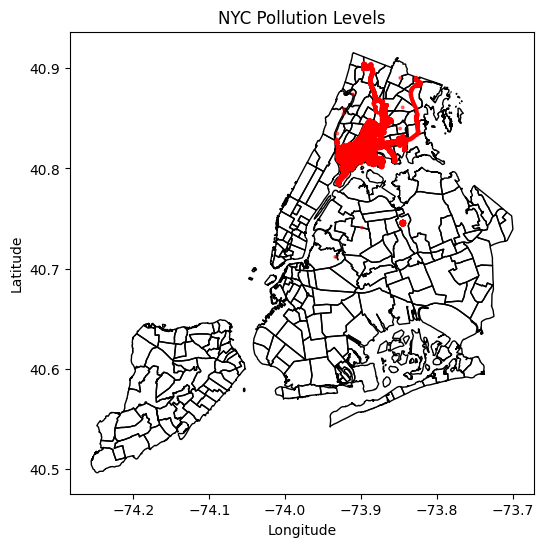

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(NYC_PM['longitude'], NYC_PM['latitude'], s=NYC_PM['pollution'], color='red', alpha=0.5)

ax.set_title("NYC Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

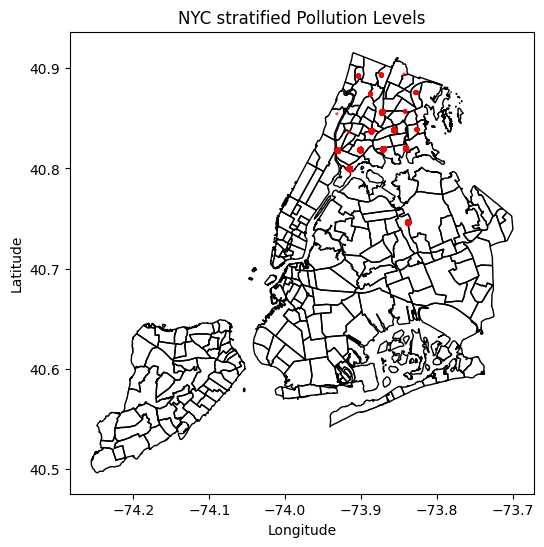

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

nyc_stratified = dataset[dataset['city'] == 'NYC']

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(nyc_stratified['longitude'], nyc_stratified['latitude'], s=nyc_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("NYC stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

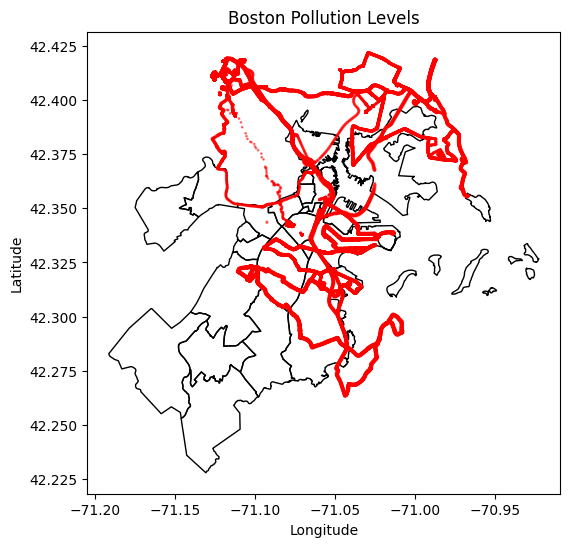

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = boston_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(BOSTON_PM['longitude'], BOSTON_PM['latitude'], s=BOSTON_PM['pollution'], color='red', alpha=0.5)

ax.set_title("Boston Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

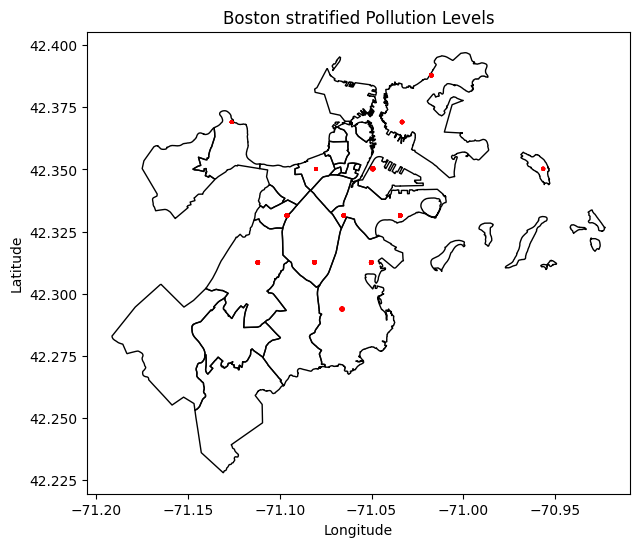

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

boston_stratified = dataset[dataset['city'] == 'Boston']

ax = boston_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(boston_stratified['longitude'], boston_stratified['latitude'], s=boston_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("Boston stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [ ]:
merged_data = dataset

In [ ]:
print("Areas containing pollution")
print("Latitude range = [" + str(min(merged_data['latitude'])) + " -- "  + str(max(merged_data['latitude'])) + "]")
print("Longitude range = [" + str(min(merged_data['longitude'])) + " -- "  + str(max(merged_data['longitude'])) + "]")

Areas containing pollution
Latitude range = [40.745894547593394 -- 42.38791313526126]
Longitude range = [-73.93192096636656 -- -70.95658174547323]


In [ ]:
#Average areas with pollution
print("Average pollution areas:")
print(sum(merged_data['latitude'])/ len(merged_data))
print(sum(merged_data['longitude'])/ len(merged_data))

Average pollution areas:
41.172403887528006
-73.24763396513843


In [ ]:
areas = merged_data['city'].unique()

In [ ]:
groups = []
for area in areas:
  groups.append(merged_data[merged_data['city'] == area])

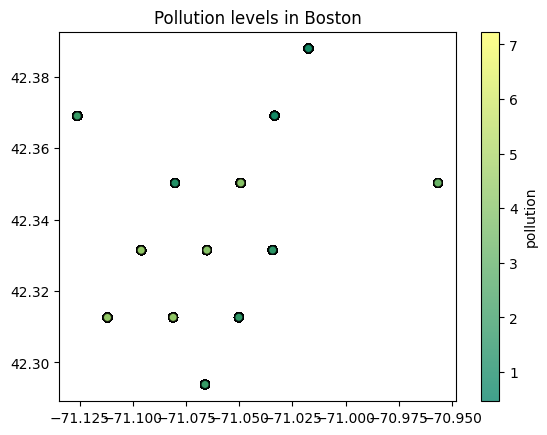

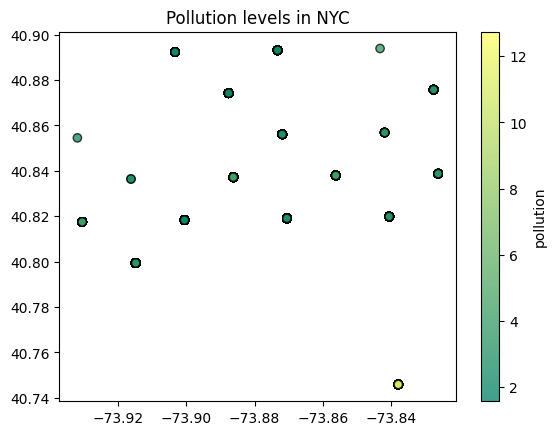

In [ ]:
index = 0
for area in areas:
  scatter_plot = plt.scatter(groups[index]['longitude'], groups[index]['latitude'], c=groups[index]['pollution'], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
  colorbar = plt.colorbar(scatter_plot, label='pollution')
  plt.title("Pollution levels in " + str(area))
  plt.show()
  index += 1

In [ ]:
merged_data[GEOHASH_ALGORITHM].value_counts()

H3
872a100a9ffffff    57068
872a10013ffffff    35801
872a100f6ffffff    12447
872a100abffffff    11977
872a30668ffffff     8906
872a100adffffff     7620
872a30645ffffff     4935
872a30663ffffff     4704
872a3066effffff     3859
872a3066cffffff     3540
872a1001affffff     3118
872a3066affffff     2483
872a30671ffffff     2272
872a3066bffffff     1976
872a3074bffffff     1840
872a1001effffff     1787
872a30661ffffff     1742
872a30641ffffff     1512
872a30665ffffff     1095
872a10012ffffff      738
872a10018ffffff      575
872a30295ffffff      260
872a100e3ffffff      224
872a10015ffffff      216
872a10016ffffff      197
872a100a5ffffff      156
872a1001cffffff       64
872a10011ffffff       15
872a100a8ffffff        2
872a100aeffffff        1
872a10014ffffff        1
Name: count, dtype: int64

# Feature selection

```TODO```
- develop a method to select features, is there an association between pollution (pm25) and the location expressed as geohash (or on a coarser level any other administrative polygon such as neighborhood)?!
so, imagine, you have a categorical variable (geohash) and a numerical response (pm25), which method you can choose for feature selection.
  > read the following article:
  [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/). Of a specific interest in this case is the ```Categorical Input, Numerical Output``` combination, in which it is recommended to use the same “Numerical Input, Categorical Output” methods <font color='red'> but in reverse </font>

for all methods below, try neighborhood, city, geohash with different precision to check wether there is an association between any of them and the respone (pollution pm)


In [ ]:
# Calculate maximum and minimum pollution values
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()

print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

Maximum pollution value: 12.74441924
Minimum pollution value: 0.464346333


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby(GEOHASH_ALGORITHM)['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby(GEOHASH_ALGORITHM).size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: -0.034445660429614826


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient
import pandas as pd
from scipy.stats import spearmanr
'''
Spearman's Rank Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable when the relationship is monotonic but not necessarily linear.
'''
# Assuming you already have merged_data DataFrame

# Calculate Spearman's rank correlation coefficient
#try neighborhood, city, geohash with different precision
correlation, p_value = spearmanr(merged_data[GEOHASH_ALGORITHM], merged_data['pollution'])

print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Spearman's correlation coefficient: -0.46490482698959873
P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)
'''
ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise, you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.

'''

from scipy.stats import f_oneway

# Assuming you already have merged_data DataFrame

# Extract pollution levels for each geohash category
#try neighborhood, city, geohash with different precision

geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*geohash_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 2725.728946427926
P-value: 0.0


In [ ]:
# METHOD 4:
from scipy.stats import kruskal
'''
Kruskal-Wallis test
Kruskal-Wallis Test: This is a non-parametric alternative to ANOVA, suitable when the assumptions of ANOVA are not met.
'''

# Extract pollution levels for each geohash category
geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*geohash_groups)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis statistic: 71867.53787633523
P-value: 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
'''
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
'''
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation coefficient
correlation, p_value = kendalltau(merged_data[GEOHASH_ALGORITHM], merged_data['pollution'])

print(f"Kendall's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Kendall's correlation coefficient: -0.3300358368625205
P-value: 0.0


# End feature selection

In [ ]:
#Pollution level collected every 5 seconds
merged_data.head()

,neighborhood,latitude,longitude,temperature,humidity,pollution,city,H3,geometry,pollution_rank
2022-02-11 15:32:14,Mission Hill,42.331407,-71.096071,12.2,33.0,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141),8107.0
2022-02-11 15:32:18,Mission Hill,42.331407,-71.096071,9.9,34.2,1.202436,Boston,872a30645ffffff,POINT (-71.09607 42.33141),7075.0
2022-02-11 15:32:19,Mission Hill,42.331407,-71.096071,12.2,32.7,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141),8107.0
2022-02-11 15:32:23,Mission Hill,42.331407,-71.096071,9.9,34.1,1.202436,Boston,872a30645ffffff,POINT (-71.09607 42.33141),7075.0
2022-02-11 15:32:24,Mission Hill,42.331407,-71.096071,12.2,32.6,1.227983,Boston,872a30645ffffff,POINT (-71.09607 42.33141),8107.0


In [ ]:
import numpy as np

# Select the desired features and add the index as a new column
dataset = merged_data[['latitude', 'longitude', 'temperature', 'humidity', 'pollution']]
dataset['time'] = merged_data.index

# Convert the datetime index to float timestamps
dataset['time'] = dataset['time'].apply(lambda x: x.timestamp())

# Convert the DataFrame to a NumPy array
values_df = dataset[['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']]

<ipython-input-88-17c1cced5580>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['time'] = merged_data.index
<ipython-input-88-17c1cced5580>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['time'] = dataset['time'].apply(lambda x: x.timestamp())


In [ ]:
values_df.head()

,time,latitude,longitude,temperature,humidity,pollution
2022-02-11 15:32:14,1.644594e+09,42.331407,-71.096071,12.2,33.0,1.227983
2022-02-11 15:32:18,1.644594e+09,42.331407,-71.096071,9.9,34.2,1.202436
2022-02-11 15:32:19,1.644594e+09,42.331407,-71.096071,12.2,32.7,1.227983
2022-02-11 15:32:23,1.644594e+09,42.331407,-71.096071,9.9,34.1,1.202436
2022-02-11 15:32:24,1.644594e+09,42.331407,-71.096071,12.2,32.6,1.227983


In [ ]:
values = values_df.to_numpy()

In [ ]:
type(values)

numpy.ndarray

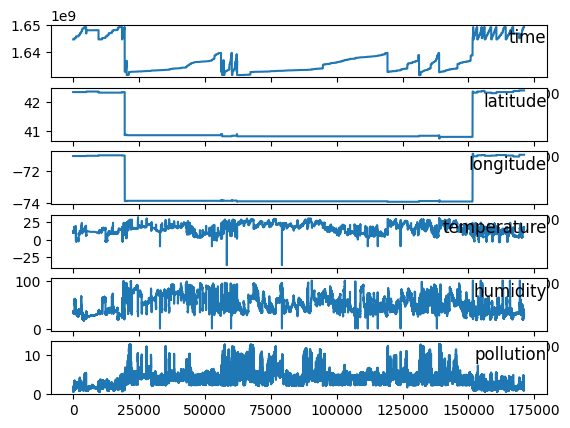

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

#we are reading our new dataframe
#header=0 means that the first row contains the column names and index_col=0 means that the first column is my indexing for my dataframe
#dataset=NYC_PM.drop(['geohash', 'geometry'], axis=1)

# here we want to save all numerical values from our dataframe to the numpy array. every row of the dataframe will be a row in our array
#and each column in our dataframe will be a column in our array. Interesting


#we want to plot our columns. we specify them
groups=[0,1,2,3,4,5]
#we are using matplotlib
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(values_df.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()


# Correlation matrix

<font color = 'blue'> from the correlation matrix, looks like the ```temperature``` is the variable that has the highest correlation with the reponse varaible ```pollution```, at the par with 0.49, other variables are less significant</font>
- having said that, drop some of the predictors (input variables)and test the performance of your algorithms again! does the performance improves in terms of accuracy, and running time!

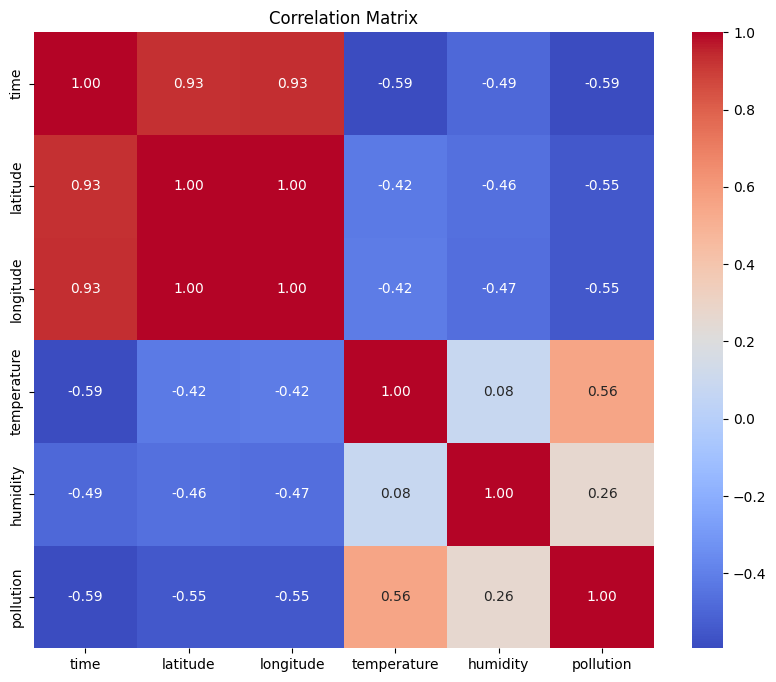

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have merged_data DataFrame

# Calculate the correlation matrix
correlation_matrix = values_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


# Preparing Data for training

In [ ]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]


    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
          agg.dropna(inplace=True)
    return agg

In [ ]:
dataset.dtypes

latitude       float64
longitude      float64
temperature    float64
humidity       float64
pollution      float64
time           float64
dtype: object

In [ ]:
values.shape

(171131, 6)

In [ ]:
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.74353,0.965586,0.953117,0.708934,0.330,0.062185,0.74353,0.965586,0.953117,0.675792,0.342,0.060105
2,0.74353,0.965586,0.953117,0.675792,0.342,0.060105,0.74353,0.965586,0.953117,0.708934,0.327,0.062185
3,0.74353,0.965586,0.953117,0.708934,0.327,0.062185,0.74353,0.965586,0.953117,0.675792,0.341,0.060105
4,0.74353,0.965586,0.953117,0.675792,0.341,0.060105,0.74353,0.965586,0.953117,0.708934,0.326,0.062185
5,0.74353,0.965586,0.953117,0.708934,0.326,0.062185,0.74353,0.965586,0.953117,0.710375,0.325,0.062185


In [ ]:
reframed.drop(reframed.columns[[6,7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)
1    0.74353   0.965586   0.953117   0.708934      0.330   0.062185
2    0.74353   0.965586   0.953117   0.675792      0.342   0.060105
3    0.74353   0.965586   0.953117   0.708934      0.327   0.062185
4    0.74353   0.965586   0.953117   0.675792      0.341   0.060105
5    0.74353   0.965586   0.953117   0.708934      0.326   0.062185


In [ ]:
# split into train and test sets
#we are taking all the values from the dataframe:reframed into a 2 Dim Numpy array that list in that array row will be one row
#Each row is represented by an inner array, and the outer array holds the entire structure.It is like a matrix
...
# split into train and test sets
values = reframed.values
n_train_hours = int((365 * 15.5) * 24)
#We are preparing the train data from the first year
#[rows,columns] ==> rows~~[start:end:step] rows of first year, all columns
# but how do you know that the first n_train_hours rows in  your original dataset represents a year, it is sorted
train = values[:n_train_hours, :]

In [ ]:
len(train)

135780

In [ ]:

#we set the rest of information as a test
test = values[n_train_hours:, :]
# split into input and outputs
#train_X: we take all the rows  for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column:pollution
train_X, train_y = train[:], train[:, -1]
test_X, test_y = test[:], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
# we know that each row of the train _X belongs to the information of 8 variable for one day of the year. now
#we want to relate it to 1=timestep. we have 3D array the first variable is the number of rows,
#the second the timestep and the last one is the number of columns
# Reshape input data to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (135780, 1, 6)
(135780, 1, 6) (135780,) (35350, 1, 6) (35350,)


In [ ]:
print("Train/Test split")
print(test_X.shape[0] / train_X.shape[0])
print(1 - (test_X.shape[0] / train_X.shape[0]))

Train/Test split
0.26034762115186333
0.7396523788481366


# Training and testing

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
1886/1886 - 9s - loss: 0.0564 - val_loss: 0.0043 - 9s/epoch - 5ms/step
Epoch 2/50
1886/1886 - 8s - loss: 0.0034 - val_loss: 0.0033 - 8s/epoch - 4ms/step
Epoch 3/50
1886/1886 - 5s - loss: 0.0028 - val_loss: 0.0031 - 5s/epoch - 3ms/step
Epoch 4/50
1886/1886 - 6s - loss: 0.0026 - val_loss: 0.0027 - 6s/epoch - 3ms/step
Epoch 5/50
1886/1886 - 6s - loss: 0.0023 - val_loss: 0.0025 - 6s/epoch - 3ms/step
Epoch 6/50
1886/1886 - 4s - loss: 0.0022 - val_loss: 0.0023 - 4s/epoch - 2ms/step
Epoch 7/50
1886/1886 - 5s - loss: 0.0021 - val_loss: 0.0022 - 5s/epoch - 3ms/step
Epoch 8/50
1886/1886 - 5s - loss: 0.0020 - val_loss: 0.0022 - 5s/epoch - 3ms/step
Epoch 9/50
1886/1886 - 4s - loss: 0.0019 - val_loss: 0.0020 - 4s/epoch - 2ms/step
Epoch 10/50
1886/1886 - 5s - loss: 0.0018 - val_loss: 0.0019 - 5s/epoch - 3ms/step
Epoch 11/50
1886/1886 - 5s - loss: 0.0017 - val_loss: 0.0018 - 5s/epoch - 3ms/step
Epoch 12/50
1886/1886 - 4s - loss: 0.0016 - val_loss: 0.0016 - 4s/epoch - 2ms/step
Epoch 13/50
1

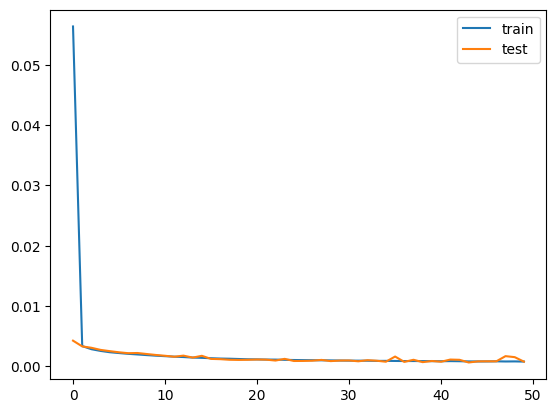

In [ ]:
# design network
model = Sequential()
model.add(LSTM(1, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X , train_y, epochs=50, validation_data=(test_X, test_y), batch_size=72, verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predict using the LSTM model
lstm_yhat = model.predict(test_X)

# Reshape and inverse transform the predictions to original scale
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_inv_yhat = concatenate((test_X1[:, 1:], lstm_yhat), axis=1)
lstm_inv_yhat = scaler.inverse_transform(lstm_inv_yhat)[:, -1]

# Inverse transform the actual values to original scale
test_y1 = test_y.reshape((len(test_y), 1))
lstm_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
lstm_inv_y1 = scaler.inverse_transform(lstm_inv_y1)[:, -1]

# Calculate evaluation metrics
mae_LSTM = mean_absolute_error(lstm_inv_y1, lstm_inv_yhat)
mse_LSTM = mean_squared_error(lstm_inv_y1, lstm_inv_yhat)
rmse_LSTM = sqrt(mse_LSTM)
mape_LSTM = np.mean(np.abs((lstm_inv_y1 - lstm_inv_yhat) / lstm_inv_y1)) * 100
r2_LSTM = r2_score(lstm_inv_y1, lstm_inv_yhat)

# Initialize counters for direction comparisons
total_correct_predictions_LSTM = 0
K = np.zeros(len(lstm_inv_yhat))
K1 = np.zeros(len(lstm_inv_y1))

# Calculate direction arrays
for i in range(1, len(lstm_inv_yhat)):
    if lstm_inv_yhat[i] > lstm_inv_yhat[i-1]:
        K[i] = 1
    elif lstm_inv_yhat[i] < lstm_inv_yhat[i-1]:
        K[i] = -1  # Use -1 for decrease
    else:
        K[i] = 0  # Use 0 for no change

    if lstm_inv_y1[i] > lstm_inv_y1[i-1]:
        K1[i] = 1
    elif lstm_inv_y1[i] < lstm_inv_y1[i-1]:
        K1[i] = -1  # Use -1 for decrease
    else:
        K1[i] = 0  # Use 0 for no change

# Count correct predictions
for i in range(1, len(lstm_inv_yhat)):
    if K[i] == K1[i]:
        total_correct_predictions_LSTM += 1

# Calculate accuracy and error rate
num_total_samples = len(lstm_inv_y1)
accuracy_LSTM = total_correct_predictions_LSTM / (num_total_samples - 1)  # Exclude the first element for valid comparison
error_rate_LSTM = 1 - accuracy_LSTM

# Print the results
print(f'MAE: {mae_LSTM :.5f}')
print(f'MSE: {mse_LSTM :.5f}')
print(f'RMSE: {rmse_LSTM :.5f}')
print(f'MAPE: {mape_LSTM :.2f}')
print(f'R²: {r2_LSTM :.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_LSTM} out of {len(test_y)}')
print(f'Accuracy: {accuracy_LSTM * 100:.2f}')

1105/1105 [==============================] - 2s 1ms/step
MAE: 0.00957
MSE: 0.00042
RMSE: 0.02059
MAPE: 0.37
R²: 0.99986
Predict the correct number of days: 29371 out of 35350
Accuracy: 83.09


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Design and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')  # You may need to tune the hyperparameters
svr_model.fit(train_X.reshape((train_X.shape[0], train_X.shape[2])), train_y)

# Make predictions
# Make predictions
yhat_svr = svr_model.predict(test_X.reshape((test_X.shape[0], test_X.shape[2])))

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat_svr = concatenate((yhat_svr.reshape((len(yhat_svr), 1)), test_X_reshaped[:, 1:]), axis=1)
#inv_yhat_svr = scaler.inverse_transform(inv_yhat_svr)
inv_yhat_svr = inv_yhat_svr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_svr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
#inv_y_svr = scaler.inverse_transform(inv_y_svr)
inv_y_svr = inv_y_svr[:,0]

In [ ]:

rmse_svr = sqrt(mean_squared_error(inv_y_svr, inv_yhat_svr))

# Calculate mse
mse_SVR=mean_squared_error(inv_y_svr, inv_yhat_svr)

# Calculate mae
mae_SVR=mean_absolute_error(inv_y_svr, inv_yhat_svr)

# Calculate Maximum Prediction Error
max_prediction_error_SVR = np.max(np.abs(inv_y_svr - inv_yhat_svr))

# Calculate R2
r2_svr = r2_score(inv_y_svr, inv_yhat_svr)

# Calculate the number of correct predictions
total_correct_predictions_SVR=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_svr[0]

for i in range(1, len(inv_yhat_svr)):
    if inv_yhat_svr[i] > last_val:
        if inv_y_svr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_svr[i] < last_val:
        if inv_y_svr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_svr[i]

# Calculate Predict the correct number of days
total_correct_predictions_SVR= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_svr)
accuracy_SVR = total_correct_predictions_SVR  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_SVR = 1 - accuracy_SVR

# Print the results
print(f'Test RMSE: {rmse_svr:.3f}')
print(f'Test MSE: {mse_SVR:.5f}')
print(f'Test MAE: {mae_SVR:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_SVR:.3f}')
print(f'R²: {r2_svr:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_SVR} out of {len(test_y)}')
print(f'Accuracy: {accuracy_SVR * 100:.2f}')
print(f'error rate: {error_rate_SVR * 100:.2f}')


Test RMSE: 0.054
Test MSE: 0.00289
Test MAE: 0.04859
Maximum Prediction Error: 0.156
R²: 0.86028
Predict the correct number of days: 22342 out of 35350
Accuracy: 63.20
error rate: 36.80


In [ ]:
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#train_X: we take all the rows for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column: pollution
train_X, train_y = train[:, :5], train[:, -1]
test_X, test_y = test[:, :5], test[:, -1]

In [ ]:
train_X.shape

(135780, 5)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X, train_y)

In [ ]:
yhat = lr.predict(test_X)
# invert scaling for forecast

rmse = sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.112


In [ ]:
yhat_lr = yhat
yhat_lr = yhat_lr.reshape((len(yhat_lr), 1))

inv_yhat_lr = concatenate((yhat_lr, test_X), axis=1)
inv_yhat_lr = scaler.inverse_transform(inv_yhat_lr)
inv_yhat_lr = inv_yhat_lr[:,-1]

test_y = test_y.reshape((len(test_y), 1))
inv_y_lr = concatenate((test_y, test_X), axis=1)
inv_y_lr = scaler.inverse_transform(inv_y_lr)
inv_y_lr = inv_y_lr[:,-1]

In [ ]:
# Calculate rmse
rmse_lr = rmse

# Calculate mse
mse_lr = mean_squared_error(inv_y_lr, inv_yhat_lr)

# Calculate mae
mae_lr = mean_absolute_error(inv_y_lr, inv_yhat_lr)

# Calculate Maximum Prediction Error
max_prediction_error_lr = np.max(np.abs(inv_y_lr - inv_yhat_lr))

# Calculate R2
r2_lr = r2_score(inv_y_svr, inv_yhat_svr)

# Calculate the number of correct predictions
total_correct_predictions_lr=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_lr[0]

for i in range(1, len(yhat)):
    if inv_yhat_lr[i] > last_val:
        if inv_y_lr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_lr[i] < last_val:
        if inv_y_lr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_lr[i]

# Calculate Predict the correct number of days
total_correct_predictions_lr= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_lr)
accuracy_lr = total_correct_predictions_lr  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_lr = 1 - accuracy_lr

# Print the results
print(f'Test RMSE: {rmse_lr:.3f}')
print(f'Test MSE: {mse_lr:.5f}')
print(f'Test MAE: {mae_lr:.5f}')
print(f'R²: {r2_lr:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_lr:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_lr} out of {len(test_y)}')
print(f'Accuracy: {accuracy_lr * 100:.2f}')
print(f'error rate: {error_rate_lr * 100:.2f}')

Test RMSE: 0.112
Test MSE: 0.00000
Test MAE: 0.00000
R²: 0.86028
Maximum Prediction Error: 0.000
Predict the correct number of days: 28904 out of 35350
Accuracy: 81.77
error rate: 18.23


In [ ]:
from keras.layers import SimpleRNN

In [ ]:
values = reframed.values
n_train_hours = int((365 * 15.5) * 24)

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:], train[:, -1]
test_X, test_y = test[:], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (135780, 1, 6)
(135780, 1, 6) (135780,) (35350, 1, 6) (35350,)


Epoch 1/50
1886/1886 - 6s - loss: 0.1097 - val_loss: 0.0236 - 6s/epoch - 3ms/step
Epoch 2/50
1886/1886 - 3s - loss: 0.0089 - val_loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 3/50
1886/1886 - 3s - loss: 0.0040 - val_loss: 0.0030 - 3s/epoch - 2ms/step
Epoch 4/50
1886/1886 - 5s - loss: 0.0029 - val_loss: 0.0018 - 5s/epoch - 3ms/step
Epoch 5/50
1886/1886 - 4s - loss: 0.0022 - val_loss: 0.0013 - 4s/epoch - 2ms/step
Epoch 6/50
1886/1886 - 3s - loss: 0.0018 - val_loss: 8.8074e-04 - 3s/epoch - 2ms/step
Epoch 7/50
1886/1886 - 3s - loss: 0.0015 - val_loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 8/50
1886/1886 - 5s - loss: 0.0013 - val_loss: 0.0011 - 5s/epoch - 3ms/step
Epoch 9/50
1886/1886 - 4s - loss: 0.0012 - val_loss: 6.1009e-04 - 4s/epoch - 2ms/step
Epoch 10/50
1886/1886 - 4s - loss: 0.0011 - val_loss: 0.0012 - 4s/epoch - 2ms/step
Epoch 11/50
1886/1886 - 5s - loss: 0.0010 - val_loss: 8.1547e-04 - 5s/epoch - 3ms/step
Epoch 12/50
1886/1886 - 4s - loss: 9.8389e-04 - val_loss: 8.5452e-04 - 4s/epoch - 2m

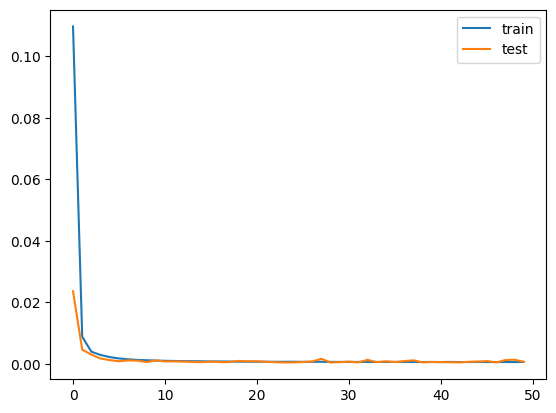

In [ ]:
model = Sequential()
model.add(SimpleRNN(1, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history =model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
rnn_yhat = model.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
rnn_inv_yhat = concatenate((test_X1[:, 1:], rnn_yhat), axis=1)
rnn_predicted_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_yhat), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
rnn_inv_yhat = rnn_inv_yhat[:,-1]

test_y1 = test_y.reshape((len(test_y), 1))
rnn_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
rnn_actual_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_y1), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
rnn_inv_y1 = rnn_inv_y1[:,-1]

# Calculate rmse
rmse_rnn = sqrt(mean_squared_error(rnn_inv_y1, rnn_inv_yhat))

# Calculate mse
mse_rnn=mean_squared_error(rnn_inv_y1, rnn_inv_yhat)

# Calculate mae
mae_rnn=mean_absolute_error(rnn_inv_y1, rnn_inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_rnn = np.max(np.abs(rnn_inv_y1, rnn_inv_yhat))

# Calculate R2
r2_rnn = r2_score(rnn_inv_y1, rnn_inv_yhat)

# Calculate the number of correct predictions

total_correct_predictions_rnn=0
K=np.zeros(len(rnn_inv_yhat))
K1=np.zeros(len(rnn_inv_yhat))

for i in range(1, len(rnn_inv_yhat)):
    if rnn_inv_yhat[i] > rnn_inv_yhat[i-1]:
        K[i]=1
    if rnn_inv_yhat[i] < rnn_inv_yhat[i-1]:
        K[i]=0
    if rnn_inv_y1[i] > rnn_inv_y1[i-1]:
        K1[i]=1
    if rnn_inv_y1[i] < rnn_inv_y1[i-1]:
        K1[i]=0
for i in range(1, len(rnn_inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_rnn=total_correct_predictions_rnn+1



# Calculate Accuracy
num_total_samples = len(rnn_inv_y1)
accuracy_rnn = total_correct_predictions_rnn / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_rnn = 1 - accuracy_rnn

# Print the results
print(f'Test RMSE: {rmse_rnn:.3f}')
print(f'Test MSE: {mse_rnn:.5f}')
print(f'Test MAE: {mae_rnn:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_rnn:.3f}')
print(f'R²: {r2_rnn:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_rnn} out of {len(test_y)}')
print(f'Accuracy: {accuracy_rnn * 100:.2f}')
print(f'error rate: {error_rate_rnn * 100:.2f}')

1105/1105 [==============================] - 2s 2ms/step
Test RMSE: 0.001
Test MSE: 0.00000
Test MAE: 0.00068
Maximum Prediction Error: 1.000
R²: 1.00000
Predict the correct number of days: 35349 out of 35350
Accuracy: 100.00
error rate: 0.00


In [ ]:
dataset = dataset[['latitude', 'longitude', 'temperature', 'humidity', 'time', 'pollution']]

In [ ]:
TRAIN_SPLIT=int(len(dataset)*0.7414231354642313)

In [ ]:
TRAIN_SPLIT

126880

In [ ]:
dataset=np.array(dataset)

In [ ]:
def multivariate_data(dataset,target,start_index,end_index,history_size,
                      target_size,step,single_step=False):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
       end_index=len(dataset)-target_size

    for i in range(start_index, end_index):
       indices=range(i-history_size,i,step)
       data.append(dataset[indices])

       if single_step:
           labels.append(target[i+target_size])
       else:
           labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
past_history=16
STEP=1
n_step=3

x_train_multi, y_train_multi=multivariate_data(dataset,dataset[:,5],0,TRAIN_SPLIT,past_history,n_step,STEP,single_step=False)
x_test_multi, y_test_multi=multivariate_data(dataset,dataset[:,5],TRAIN_SPLIT,None,past_history,n_step,STEP,single_step=False)

In [ ]:
scalers={}
for i in range(x_train_multi.shape[1]):
      scalers [i]=MinMaxScaler(feature_range=(0,1))
      x_train_multi[:,i,:]=scalers[i].fit_transform(x_train_multi[:,i,:])
for i in range(x_test_multi.shape[1]):
      x_test_multi[:,i,:]=scalers[i].fit_transform(x_test_multi[:,i,:])

In [ ]:
scaler_y=MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.fit_transform(y_test_multi)

In [ ]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0], x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0], x_test_multi.shape[1]*x_test_multi.shape[2])

In [ ]:
MLP_model=Sequential()
MLP_model.add(Dense(50,activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(1, activation='relu'))

MLP_model.add(Dense(n_step, activation='selu'))
MLP_model.compile(optimizer='adam',loss='mse', run_eagerly=True)
MLP_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                4850      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
Total params: 4907 (19.17 KB)
Trainable params: 4907 (19.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_MLP=MLP_model.fit(x_train_multi_2d,y_train_multi,epochs=30,batch_size=72,validation_data=(x_test_multi_2d,y_test_multi))

Epoch 1/30
1762/1762 [==============================] - 62s 35ms/step - loss: 0.0304 - val_loss: 0.0292
Epoch 2/30
1762/1762 [==============================] - 61s 34ms/step - loss: 0.0245 - val_loss: 0.0288
Epoch 3/30
1762/1762 [==============================] - 64s 36ms/step - loss: 0.0245 - val_loss: 0.0291
Epoch 4/30
1762/1762 [==============================] - 55s 31ms/step - loss: 0.0245 - val_loss: 0.0292
Epoch 5/30
1762/1762 [==============================] - 57s 32ms/step - loss: 0.0245 - val_loss: 0.0289
Epoch 6/30
1762/1762 [==============================] - 55s 31ms/step - loss: 0.0245 - val_loss: 0.0292
Epoch 7/30
1762/1762 [==============================] - 53s 30ms/step - loss: 0.0245 - val_loss: 0.0288
Epoch 8/30
1762/1762 [==============================] - 54s 31ms/step - loss: 0.0245 - val_loss: 0.0290
Epoch 9/30
1762/1762 [==============================] - 55s 31ms/step - loss: 0.0245 - val_loss: 0.0293
Epoch 10/30
1762/1762 [==============================] - 59s 34m

In [ ]:
y_predicted=MLP_model.predict(x_test_multi_2d)

1383/1383 [==============================] - 5s 4ms/step


In [ ]:
y_predicted_inv=scaler_y.inverse_transform(y_predicted)

In [ ]:
y_test_multi_inv=scaler_y.inverse_transform(y_test_multi)

In [ ]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# Calculate rmse
rmse_MLP = sqrt(mse(y_test_multi_inv, y_predicted_inv))

# Calculate mse
mse_MLP = mse(y_test_multi_inv, y_predicted_inv)

# Calculate mae
mae_MLP = mean_absolute_error(y_test_multi_inv, y_predicted_inv)

# Calculate Maximum Prediction Error
max_prediction_error_MLP = np.max(np.abs(y_test_multi_inv - y_predicted_inv))

# Calculate R2
r2_MLP = r2_score(y_test_multi_inv, y_predicted_inv)

# Calculate the number of correct predictions
predict_MLPp=y_predicted_inv[:,2]
y_test_multii=y_test_multi_inv[:,2]
total_correct_predictions_MLP=0
K=np.zeros(len(predict_MLPp))
K1=np.zeros(len(predict_MLPp))

for i in range(1, len(predict_MLPp)):
    if predict_MLPp[i] > predict_MLPp[i-1]:
        K[i]=1
    if predict_MLPp[i] < predict_MLPp[i-1]:
        K[i]=0
    if y_test_multii[i] > y_test_multii[i-1]:
        K1[i]=1
    if y_test_multii[i] < y_test_multii[i-1]:
        K1[i]=0
for i in range(1, len(predict_MLPp)):
    if K[i]==K1[i]:
        total_correct_predictions_MLP=total_correct_predictions_MLP+1

# Calculate Accuracy
num_total_samples = len(predict_MLPp)
accuracy_MLP = total_correct_predictions_MLP  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_MLP = 1 - accuracy_MLP

# Print the results
print(f'Test RMSE: {rmse_MLP:.3f}')
print(f'Test MSE: {mse_MLP:.5f}')
print(f'Test MAE: {mae_MLP:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_MLP:.3f}')
print(f'R²: {r2_MLP:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_MLP} out of {len(test_y)}')
print(f'Accuracy: {accuracy_MLP * 100:.2f}')
print(f'error rate: {error_rate_MLP * 100:.2f}')

Test RMSE: 2.099
Test MSE: 4.40627
Test MAE: 1.65765
Maximum Prediction Error: 8.764
R²: -0.18512
Predict the correct number of days: 27683 out of 35350
Accuracy: 62.59
error rate: 37.41


<font color='red'> results: accuracy-based and time-based</font>
use other metrics to calculate the accuracy
- **Evaluation Metrics**: Use appropriate evaluation metrics to quantify the performance of each model. For regression tasks like predicting pollution levels, common metrics include:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R^2) coefficient of determination
- also, similar to the method used in the paper, consider **"The correct number of days predicted by LSTM-based method as opposed to the other methods"**
  - check the paper titled **"Air quality prediction using CT-LSTM"** in the attached literature!

- you specificlly need to draw performance graphs similar to the following:

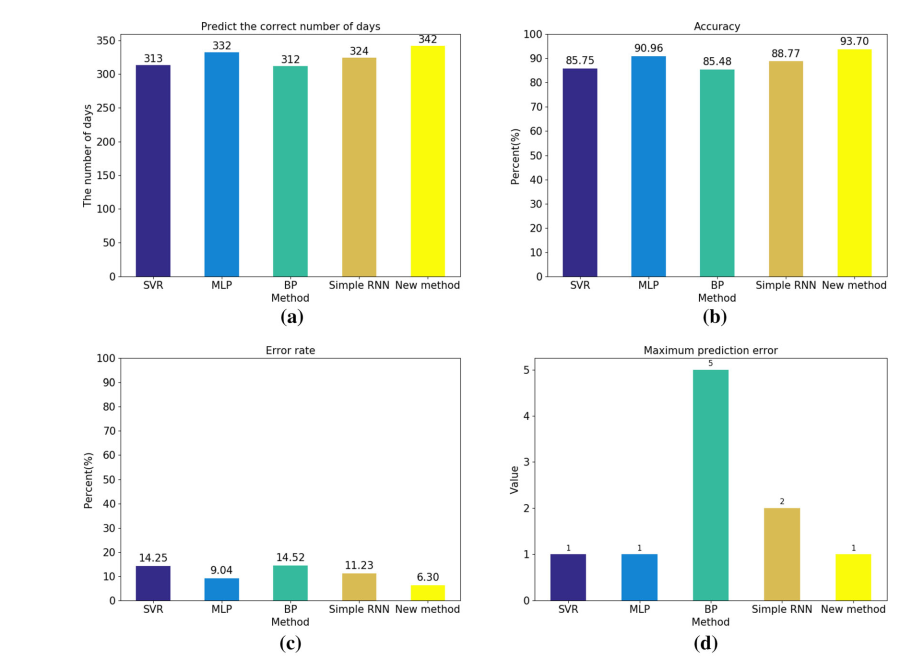

and the following

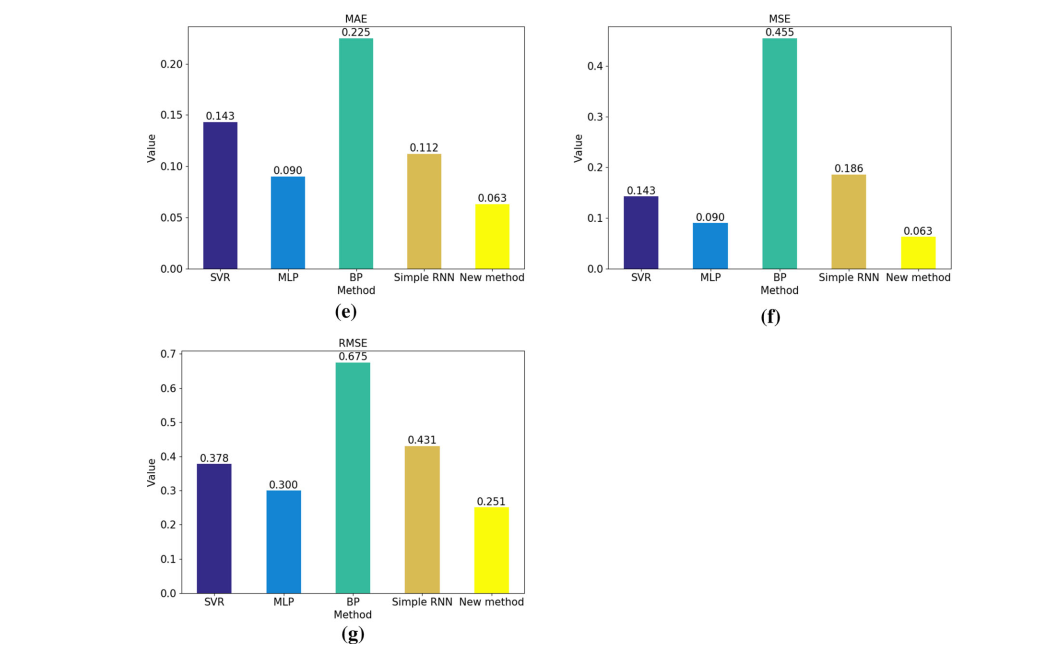

<font color='red'> the following figure is not clear, change x-axis (time) to something more visible and interpretable. For example, hour, day, week, etc.</font>

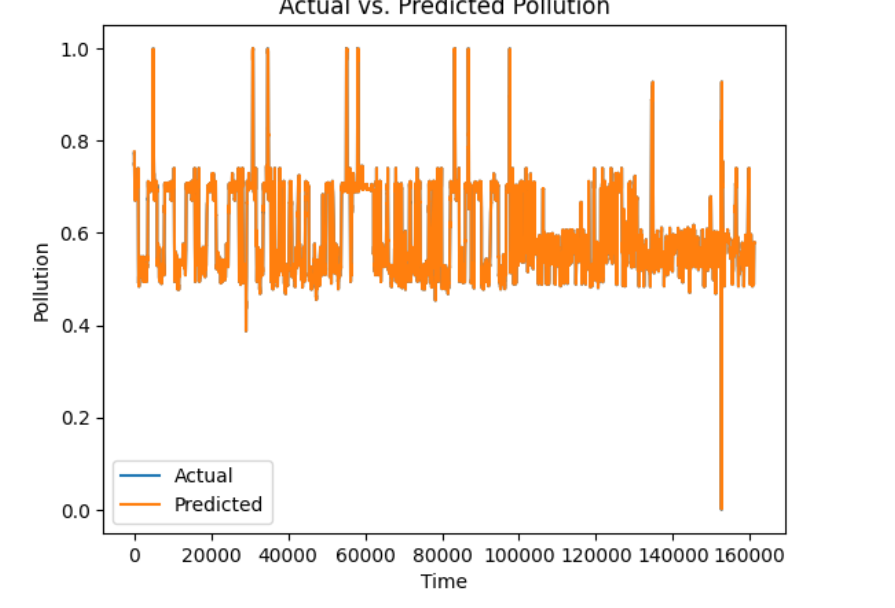

# Results

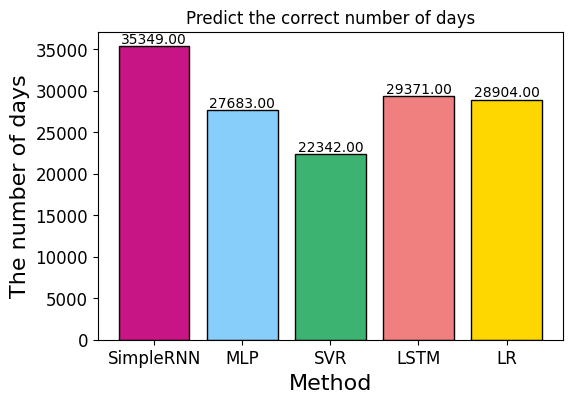

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [total_correct_predictions_rnn, total_correct_predictions_MLP, total_correct_predictions_SVR, total_correct_predictions_LSTM, total_correct_predictions_lr]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('The number of days', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Predict the correct number of days")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

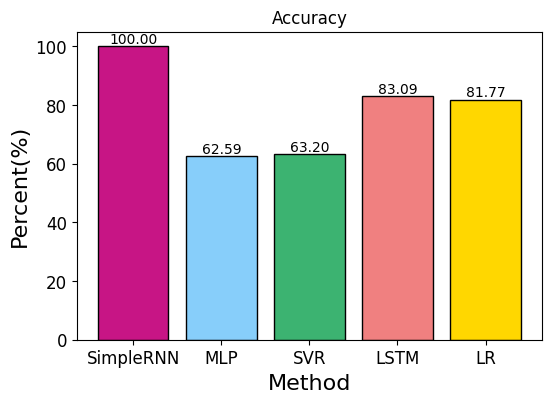

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [accuracy_rnn*100, accuracy_MLP*100, accuracy_SVR*100, accuracy_LSTM*100, accuracy_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

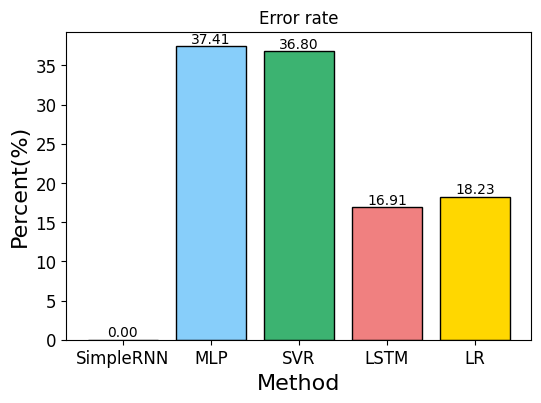

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [error_rate_rnn*100, error_rate_MLP*100, error_rate_SVR*100, error_rate_LSTM*100, error_rate_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6, 4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error rate")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')

plt.show()

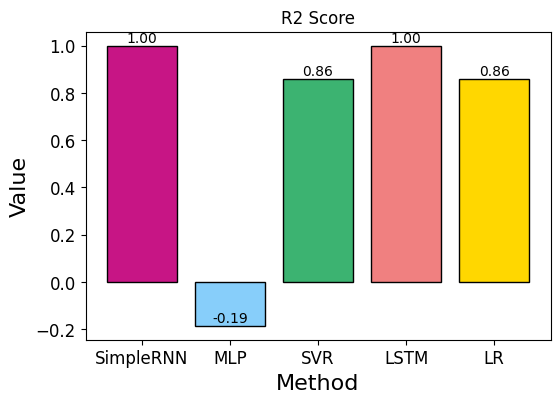

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [r2_rnn, r2_MLP, r2_svr, r2_LSTM, r2_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("R2 Score")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

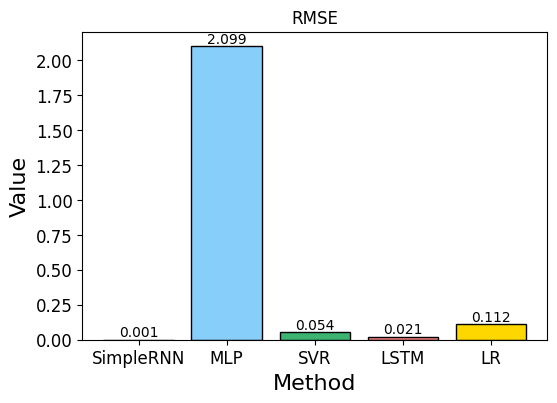

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [rmse_rnn, rmse_MLP, rmse_svr, rmse_LSTM, rmse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')


plt.show()

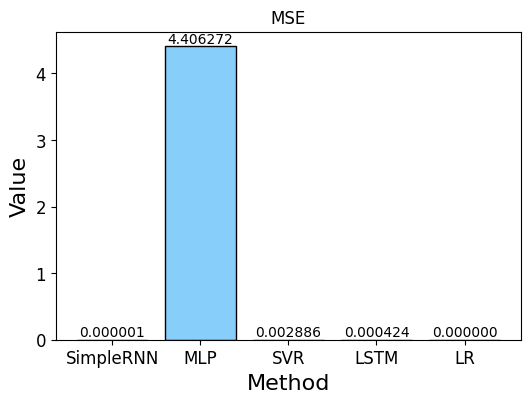

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mse_rnn, mse_MLP, mse_SVR, mse_LSTM, mse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.6f}', ha='center', va='bottom')


plt.show()

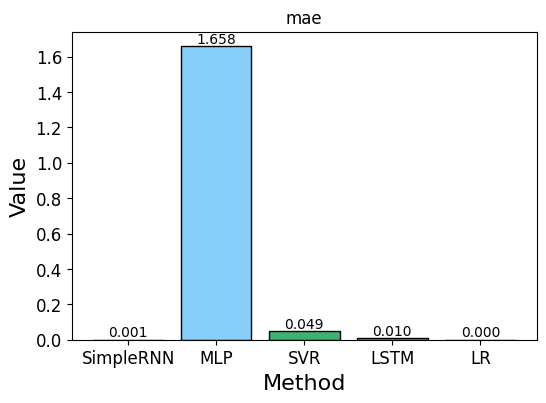

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mae_rnn, mae_MLP, mae_SVR, mae_LSTM, mae_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("mae")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')

plt.show()

In [ ]:
test_X_inverted = scaler.inverse_transform(test_X1)

In [ ]:
dates = test_X_inverted[:, 0]

In [ ]:
from datetime import datetime

dates = [datetime.fromtimestamp(int(timestamp)) for timestamp in dates]

In [ ]:
dates = dates[::5000]
actual = lstm_inv_y1[::5000]
predicted = lstm_inv_yhat[::5000]

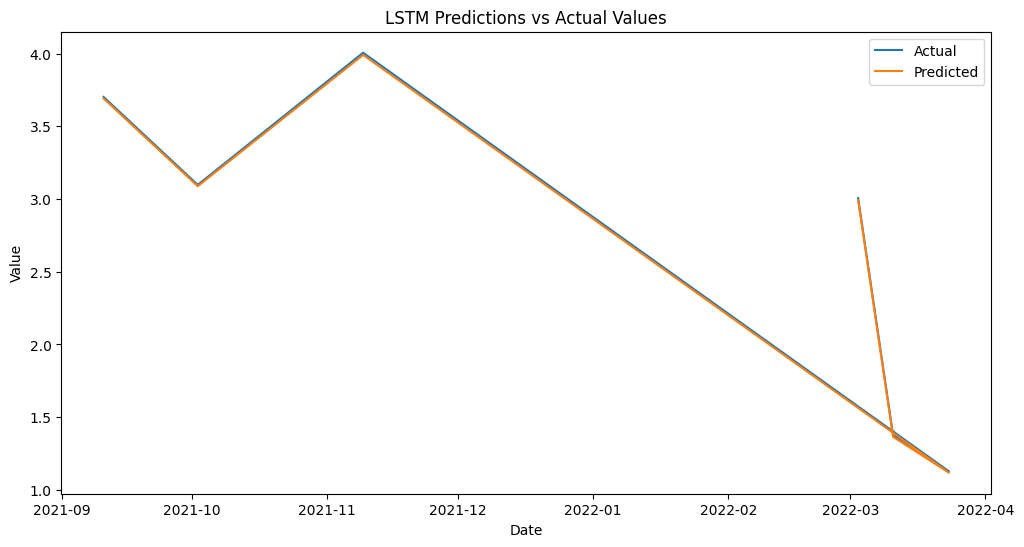

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates, actual, label='Actual')
plt.plot(dates, predicted, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()

Maximum pollution value: 12.74441924
Minimum pollution value: 0.464346333


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


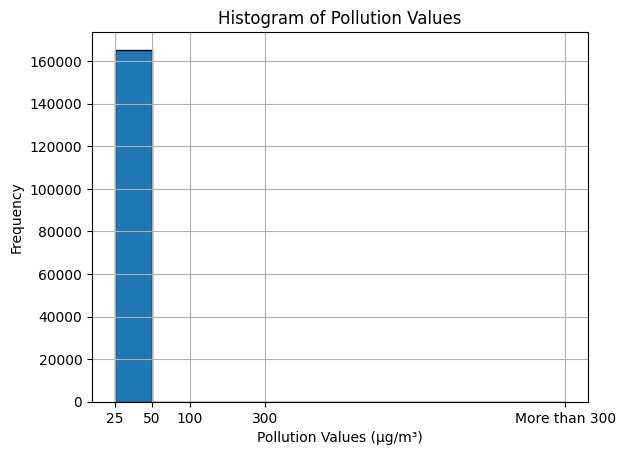

No outliers found.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# 1. Determine maximum and minimum values of pollution
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()
print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

# 2. Create bins and labels
bins = [0, 25, 50, 100, 300, np.inf]
bin_labels = ['25', '50', '100', '300', 'More than 300']

# 3. Plot histogram
plt.hist(merged_data['pollution'], bins=bins, edgecolor='black')
plt.xlabel('Pollution Values (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of Pollution Values')

# 4. Adjust x-axis ticks and labels
plt.xticks(bins[:-1], bin_labels)

# 5. Show grid
plt.grid(True)

# 6. Show plot
plt.show()

# 7. Check for outliers
outliers = merged_data[merged_data['pollution'] > 300]
if len(outliers) > 0:
    print(f"Number of outliers: {len(outliers)}")
    # If outliers are small in number, drop them
    # merged_data = merged_data[merged_data['pollution'] <= 300]
else:
    print("No outliers found.")

In [ ]:
merged_data.index = pd.to_datetime(merged_data.index)

In [ ]:
# Explore temporal distribution
start_date = merged_data.index.min()
end_date = merged_data.index.max()
data_duration = end_date - start_date
print("Start Date:", start_date)
print("End Date:", end_date)
print("Data Duration:", data_duration)


Start Date: 2021-09-10 12:29:09
End Date: 2022-04-05 19:22:51
Data Duration: 207 days 06:53:42


<Axes: >

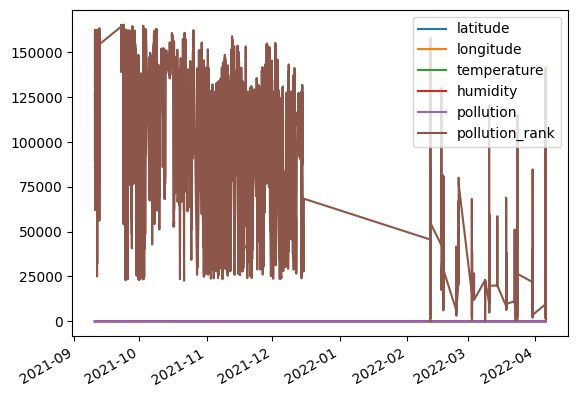

In [ ]:
# Analyze spatial distribution
#Visualize the spatial distribution of pollution levels using maps.
#Identify areas with high and low pollution concentrations.
merged_data.plot(column='pollution', legend=True)


<Axes: title={'center': 'Pollution Levels Over Time'}>

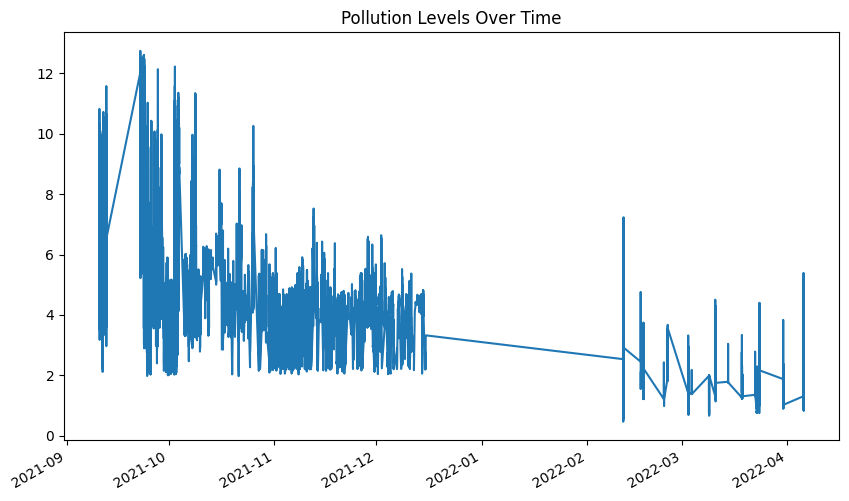

In [ ]:
merged_data['pollution'].plot(figsize=(10, 6), title='Pollution Levels Over Time')

Correlation Matrix:
             pollution  temperature  humidity
pollution     1.000000     0.544395  0.240336
temperature   0.544395     1.000000  0.035233
humidity      0.240336     0.035233  1.000000


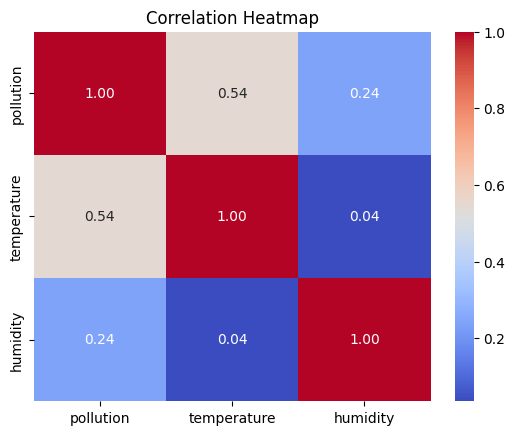

In [ ]:
import seaborn as sns
#This code calculates the correlation matrix between pollution levels, temperature, and humidity, and then visualizes the correlations using a heatmap.
# Explore correlations
corr_matrix = merged_data[['pollution', 'temperature', 'humidity']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

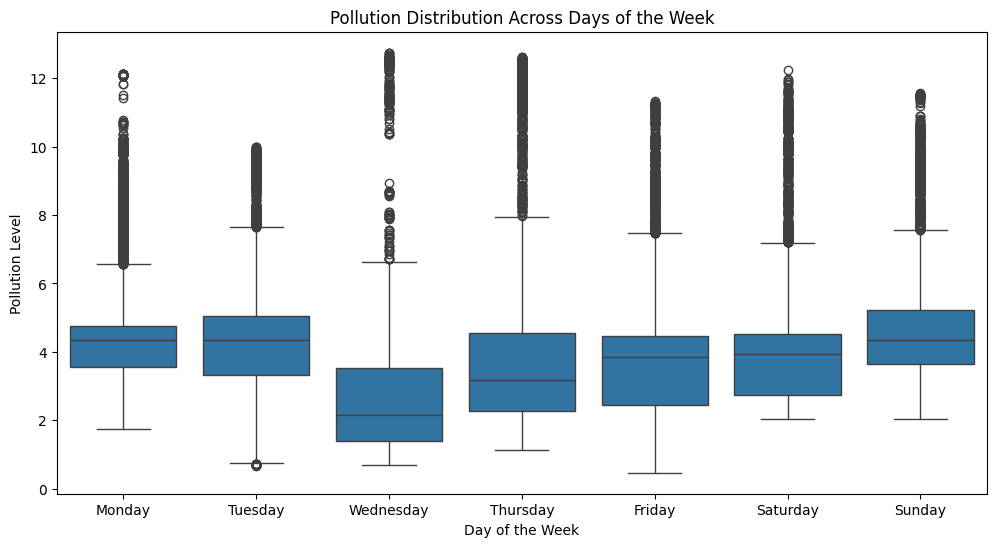

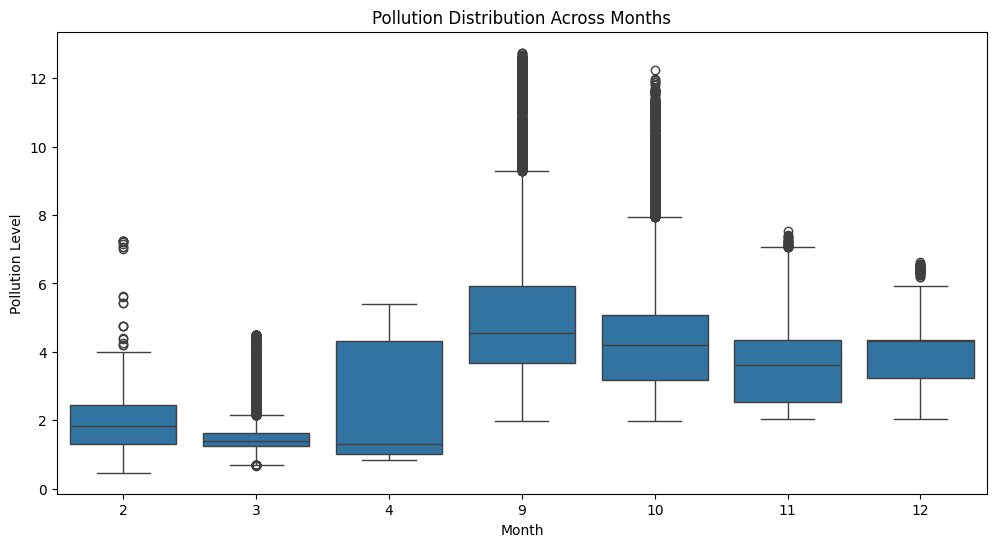

Daily Summary Statistics:
                     count      mean  std       min       25%       50%  \
date                                                                      
2021-09-10 12:29:09    1.0  4.671425  NaN  4.671425  4.671425  4.671425   
2021-09-10 12:29:12    1.0  4.314229  NaN  4.314229  4.314229  4.314229   
2021-09-10 12:29:14    1.0  4.671425  NaN  4.671425  4.671425  4.671425   
2021-09-10 12:29:22    1.0  4.363049  NaN  4.363049  4.363049  4.363049   
2021-09-10 12:29:24    1.0  4.884529  NaN  4.884529  4.884529  4.884529   
...                    ...       ...  ...       ...       ...       ...   
2022-04-05 19:22:37    1.0  1.773904  NaN  1.773904  1.773904  1.773904   
2022-04-05 19:22:42    1.0  1.661621  NaN  1.661621  1.661621  1.661621   
2022-04-05 19:22:46    1.0  0.824591  NaN  0.824591  0.824591  0.824591   
2022-04-05 19:22:47    1.0  1.726776  NaN  1.726776  1.726776  1.726776   
2022-04-05 19:22:51    1.0  0.825217  NaN  0.825217  0.825217  0.825217   

In [ ]:
# Step 1: Extract temporal information
merged_data['day_of_week'] = merged_data.index.dayofweek  # Extract day of the week (Monday = 0, Sunday = 6)
merged_data['month'] = merged_data.index.month  # Extract month
merged_data['year'] = merged_data.index.year  # Extract year
merged_data['date'] = merged_data.index.values

# Step 2: Analyze distribution of pollution levels across days of the week and months
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pollution Level')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Pollution Level')
plt.show()



# Step 3: Calculate summary statistics
daily_summary = merged_data.groupby('date')['pollution'].describe()
monthly_summary = merged_data.groupby(['year', 'month'])['pollution'].describe()

print("Daily Summary Statistics:")
print(daily_summary)

print("\nMonthly Summary Statistics:")
print(monthly_summary)

In [ ]:
import pandas as pd
import scipy.stats as stats


# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*[group['pollution'] for name, group in merged_data.groupby(GEOHASH_ALGORITHM)])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in pollution levels across different geohash categories.")

F-statistic: 57.78292835250689
p-value: 0.0
Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''



# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('neighborhood')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('neighborhood').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: -0.09020981226706032


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby(GEOHASH_ALGORITHM)['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby(GEOHASH_ALGORITHM).size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: 0.07667226617472331


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('city')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('city').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 5  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")

Reverse Kendall's correlation coefficient for geohash: -0.07159924926194092
Reverse Kendall's correlation coefficient for neighborhood: 0.18391612888555706
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 6  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")

Reverse Kendall's correlation coefficient for geohash: -0.07159924926194092
Reverse Kendall's correlation coefficient for neighborhood: 0.18391612888555706
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 7  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")


Reverse Kendall's correlation coefficient for geohash: -0.07159924926194092
Reverse Kendall's correlation coefficient for neighborhood: 0.18391612888555706
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient

import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient between geohash and pollution
geohash_corr, geohash_p_value = spearmanr(merged_data[GEOHASH_ALGORITHM], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between neighborhood and pollution
neighborhood_corr, neighborhood_p_value = spearmanr(merged_data['neighborhood'], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between city and pollution
city_corr, city_p_value = spearmanr(merged_data['city'], merged_data['pollution'])

print("Spearman's Rank Correlation Coefficients:")
print(f"{GEOHASH_ALGORITHM} vs. Pollution: {geohash_corr}")
print(f"Neighborhood vs. Pollution: {neighborhood_corr}")
print(f"city vs. Pollution: {city_corr}")

print("\nP-values:")
print(f"{GEOHASH_ALGORITHM} vs. Pollution: {geohash_p_value}")
print(f"Neighborhood vs. Pollution: {neighborhood_p_value}")
print(f"city vs. Pollution: {city_p_value}")

Spearman's Rank Correlation Coefficients:
geohash vs. Pollution: -0.41288961997144347
Neighborhood vs. Pollution: -0.07558727039725836
city vs. Pollution: 0.5906024909339785

P-values:
geohash vs. Pollution: 0.0
Neighborhood vs. Pollution: 4.472808575556306e-208
city vs. Pollution: 0.0


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5, 6, 7]

# Initialize dictionaries to store Spearman's rank correlation coefficients and p-values
spearman_results = {}

# Iterate over each precision level and calculate Spearman's rank correlation coefficient
for precision in precision_levels:
    # Create geohash codes with the current precision level
    merged_data[f'geohash_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
    # Calculate Spearman's rank correlation coefficient between geohash and pollution
    correlation, p_value = spearmanr(merged_data[f'geohash_precision_{precision}'], merged_data['pollution'])
    # Store results in dictionary
    spearman_results[f'geohash_precision_{precision}'] = (correlation, p_value)

# Print Spearman's rank correlation coefficients and p-values for geohash
print("Spearman's Rank Correlation Coefficients for Geohash:")
for precision, result in spearman_results.items():
    print(f"Precision {precision.split('_')[-1]}: {result[0]}")
    print(f"P-value: {result[1]}")


Spearman's Rank Correlation Coefficients for Geohash:
Precision 3: -0.592777265764328
P-value: 0.0
Precision 4: -0.5903577961132871
P-value: 0.0
Precision 5: -0.41374236361131855
P-value: 0.0
Precision 6: -0.4053064969944017
P-value: 0.0
Precision 7: -0.40529706845961777
P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

"""ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise,
you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.
"""
from scipy.stats import f_oneway


# Extract pollution levels for each neighborhood, city, and geohash category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
city_groups = [merged_data[merged_data['city'] == category]['pollution'] for category in merged_data['city'].unique()]
geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform ANOVA tests
f_statistic_neighborhood, p_value_neighborhood = f_oneway(*neighborhood_groups)
f_statistic_city, p_value_city = f_oneway(*city_groups)
f_statistic_geohash, p_value_geohash = f_oneway(*geohash_groups)

print("ANOVA Test Results:")
print(f"Neighborhood - F-statistic: {f_statistic_neighborhood}, P-value: {p_value_neighborhood}")
print(f"City - F-statistic: {f_statistic_city}, P-value: {p_value_city}")
print(f"Geohash - F-statistic: {f_statistic_geohash}, P-value: {p_value_geohash}")

ANOVA Test Results:
Neighborhood - F-statistic: 1297.1640570994591, P-value: 0.0
City - F-statistic: 58591.24844945861, P-value: 0.0
Geohash - F-statistic: 3255.417099844319, P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

from scipy.stats import f_oneway
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5]

# Initialize dictionaries to store ANOVA test results
anova_results = {'neighborhood': {}, 'city': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform ANOVA test
for feature in anova_results.keys():
    if feature == 'geohash':
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform ANOVA test for geohash with current precision
            f_statistic, p_value = f_oneway(*geohash_groups)
            # Store results in dictionary
            anova_results[feature][f'precision_{precision}'] = (f_statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        # Store results in dictionary
        anova_results[feature] = (f_statistic, p_value)

# Print ANOVA test results
print("ANOVA Test Results:")
for feature, result in anova_results.items():
    if feature == 'geohash':
        print(f"For {feature}:")
        for precision, (f_statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: F-statistic = {f_statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: F-statistic = {result[0]}, P-value = {result[1]}")


ANOVA Test Results:
For neighborhood: F-statistic = 1297.1640570994591, P-value = 0.0
For city: F-statistic = 58591.24844945861, P-value = 0.0
For geohash:
  Precision Level precision_3: F-statistic = 31512.572310207684, P-value = 0.0
  Precision Level precision_4: F-statistic = 12607.152101940472, P-value = 0.0
  Precision Level precision_5: F-statistic = 3631.4399569179895, P-value = 0.0


In [ ]:
# METHOD 4:

from scipy.stats import kruskal

# Extract pollution levels for each category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
city_groups = [merged_data[merged_data['city'] == category]['pollution'] for category in merged_data['city'].unique()]
geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform Kruskal-Wallis test for neighborhood
statistic_neighborhood, p_value_neighborhood = kruskal(*neighborhood_groups)

# Perform Kruskal-Wallis test for city
statistic_city, p_value_city = kruskal(*city_groups)

# Perform Kruskal-Wallis test for geohash
statistic_geohash, p_value_geohash = kruskal(*geohash_groups)

print("Kruskal-Wallis Test Results:")
print(f"Neighborhood: Statistic = {statistic_neighborhood}, P-value = {p_value_neighborhood}")
print(f"City: Statistic = {statistic_city}, P-value = {p_value_city}")
print(f"Geohash: Statistic = {statistic_geohash}, P-value = {p_value_geohash}")


Kruskal-Wallis Test Results:
Neighborhood: Statistic = 60021.719908512474, P-value = 0.0
City: Statistic = 57685.36674004054, P-value = 0.0
Geohash: Statistic = 58785.030934155635, P-value = 0.0


In [ ]:
# METHOD 4:

from scipy.stats import kruskal
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5, 6, 7]

# Initialize dictionaries to store Kruskal-Wallis test results
kruskal_results = {'neighborhood': {}, 'city': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform Kruskal-Wallis test
for feature in kruskal_results.keys():
    if feature == GEOHASH_ALGORITHM:
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform Kruskal-Wallis test for geohash with current precision
            statistic, p_value = kruskal(*geohash_groups)
            # Store results in dictionary
            kruskal_results[feature][f'precision_{precision}'] = (statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*groups)
        # Store results in dictionary
        kruskal_results[feature] = (statistic, p_value)

# Print Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
for feature, result in kruskal_results.items():
    if feature == GEOHASH_ALGORITHM:
        print(f"For {feature}:")
        for precision, (statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: Statistic = {statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: Statistic = {result[0]}, P-value = {result[1]}")


Kruskal-Wallis Test Results:
For neighborhood: Statistic = 60021.719908512474, P-value = 0.0
For city: Statistic = 57685.36674004054, P-value = 0.0
For geohash:
  Precision Level precision_3: Statistic = 58114.79777859039, P-value = 0.0
  Precision Level precision_4: Statistic = 58137.812847704554, P-value = 0.0
  Precision Level precision_5: Statistic = 58830.67217030421, P-value = 0.0
  Precision Level precision_6: Statistic = 60903.53276236647, P-value = 0.0
  Precision Level precision_7: Statistic = 61004.558437979176, P-value = 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
"""
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
"""


from scipy.stats import kendalltau
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Assuming you already have merged_data DataFrame

# Define a list of features to consider (neighborhood, city, and geohash)
features = ['neighborhood', 'city', GEOHASH_ALGORITHM]

# Define a list of precision levels to test
precision_levels = [3, 4, 5, 6, 7]  # Adjust as needed

# Initialize dictionaries to store correlation coefficients and p-values for each feature and precision level
correlation_results = {feature: {} for feature in features}
p_value_results = {feature: {} for feature in features}

# Iterate over each feature and precision level and compute Kendall's Tau correlation coefficient
for feature in features:
    for precision in precision_levels:
        if feature == GEOHASH_ALGORITHM:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)

            # Calculate Kendall's Tau correlation coefficient for geohash
            correlation, p_value = kendalltau(merged_data[f'{feature}_precision_{precision}'], merged_data['pollution'])
        else:
            # Assuming you have neighborhood and city data available in the DataFrame
            # Calculate Kendall's Tau correlation coefficient for neighborhood and city
            correlation, p_value = kendalltau(merged_data[feature], merged_data['pollution'])

        # Store results in dictionaries
        correlation_results[feature][precision] = correlation
        p_value_results[feature][precision] = p_value

# Print correlation coefficients and p-values for each feature and precision level
for feature in features:
    print(f"Kendall's Tau Correlation Coefficient Results for {feature}:")
    for precision, correlation in correlation_results[feature].items():
        print(f"For {feature} Precision Level {precision}: Correlation = {correlation}, P-value = {p_value_results[feature][precision]}")


Kendall's Tau Correlation Coefficient Results for neighborhood:
For neighborhood Precision Level 3: Correlation = -0.053245385059978986, P-value = 1.631949685571108e-207
For neighborhood Precision Level 4: Correlation = -0.053245385059978986, P-value = 1.631949685571108e-207
For neighborhood Precision Level 5: Correlation = -0.053245385059978986, P-value = 1.631949685571108e-207
For neighborhood Precision Level 6: Correlation = -0.053245385059978986, P-value = 1.631949685571108e-207
For neighborhood Precision Level 7: Correlation = -0.053245385059978986, P-value = 1.631949685571108e-207
Kendall's Tau Correlation Coefficient Results for city:
For city Precision Level 3: Correlation = 0.4825781499575101, P-value = 0.0
For city Precision Level 4: Correlation = 0.4825781499575101, P-value = 0.0
For city Precision Level 5: Correlation = 0.4825781499575101, P-value = 0.0
For city Precision Level 6: Correlation = 0.4825781499575101, P-value = 0.0
For city Precision Level 7: Correlation = 0.48

In [ ]:
#We group the DataFrame by the 'geohash' column and calculate the correlation coefficient between pollution values within each geohash group.
#The result is a correlation coefficient matrix where each row and column represent a unique geohash value, and the values represent the correlation
#coefficient between pollution values associated with those geohashes.

#Calculate correlation coefficient matrix based on geohash values and pollution values
correlation_matrix = merged_data.groupby(GEOHASH_ALGORITHM)['pollution'].corr(merged_data['pollution'])

# Print correlation coefficient matrix
print("Correlation Coefficient Matrix based on Geohash values:")
print(correlation_matrix)

Correlation Coefficient Matrix based on Geohash values:
geohash
dr5rz    1.000000
dr72j    0.991316
dr72m    1.000000
dr72n    0.992723
dr72p    0.956804
dr72q    0.994439
dr72r    0.999088
dr72w    1.000000
dr72x    1.000000
dr782    1.000000
dr788    0.996186
drt2t    0.973884
drt2v    0.977920
drt2w    0.968624
drt2x    0.978705
drt2y    0.975995
drt2z    0.995970
drt3j    1.000000
drt3n    1.000000
drt3p    1.000000
drt90    1.000000
Name: pollution, dtype: float64


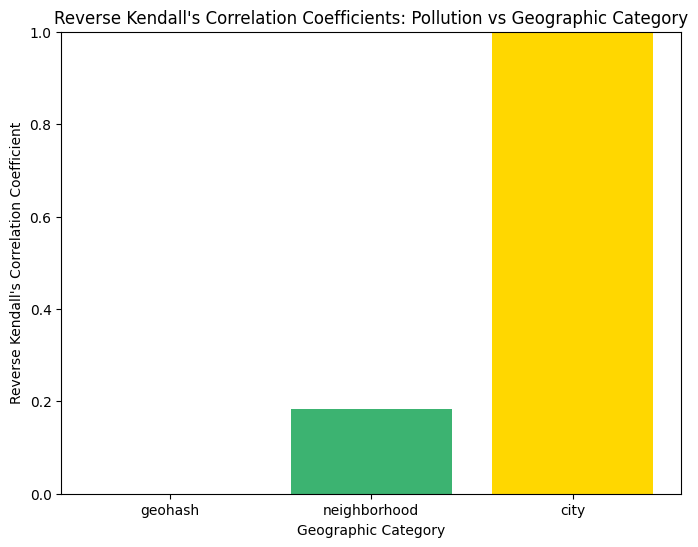

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and city)variables obtained from Reverse Kendall
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = [GEOHASH_ALGORITHM, "neighborhood", "city"]

# Corresponding correlation coefficients
correlation_values = [correlation_geohash, correlation_neighborhood , correlation_city]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Reverse Kendall's Correlation Coefficient")
plt.title("Reverse Kendall's Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

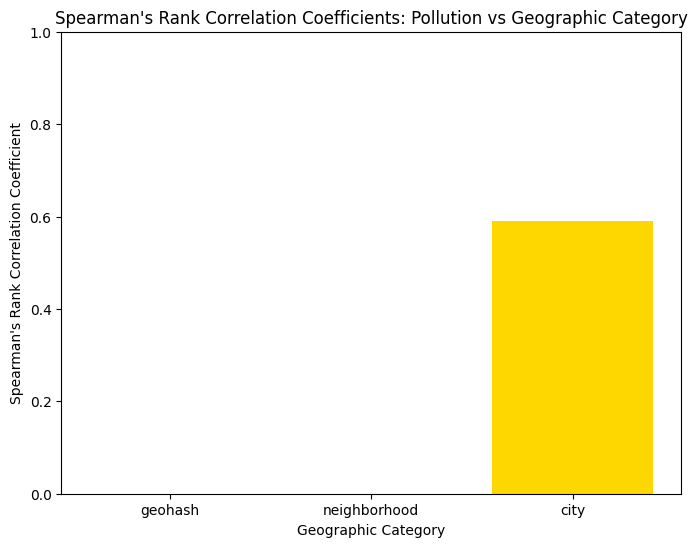

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and city)variables obtained from Spearman's Rank
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = [GEOHASH_ALGORITHM, "neighborhood", "city"]

# Corresponding correlation coefficients
correlation_values = [geohash_corr, neighborhood_corr, city_corr]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Spearman's Rank Correlation Coefficient")
plt.title("Spearman's Rank Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

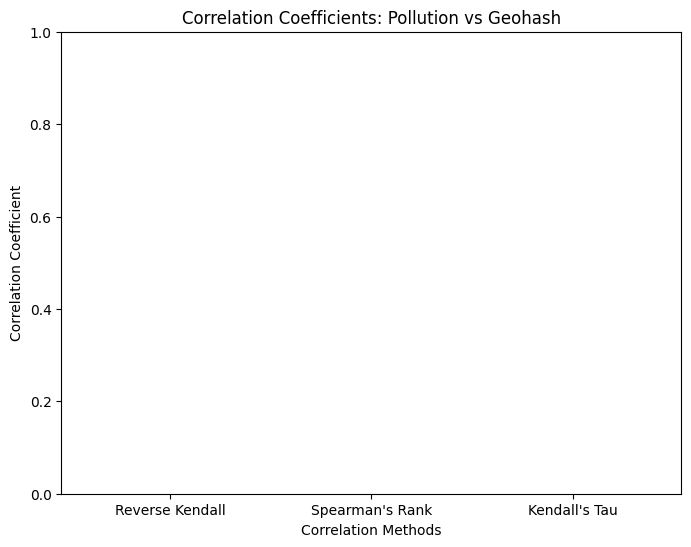

In [ ]:
#Correlation Coefficients between Pollution and geohash variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_geohash, geohash_corr , correlation_results[GEOHASH_ALGORITHM][7]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs Geohash')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

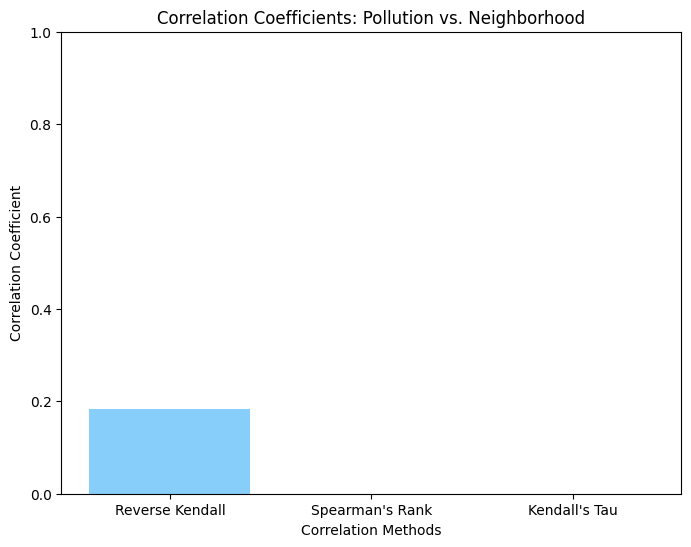

In [ ]:
#Correlation Coefficients between Pollution and Neighborhood variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_neighborhood, neighborhood_corr , correlation_results['neighborhood'][3]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. Neighborhood')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

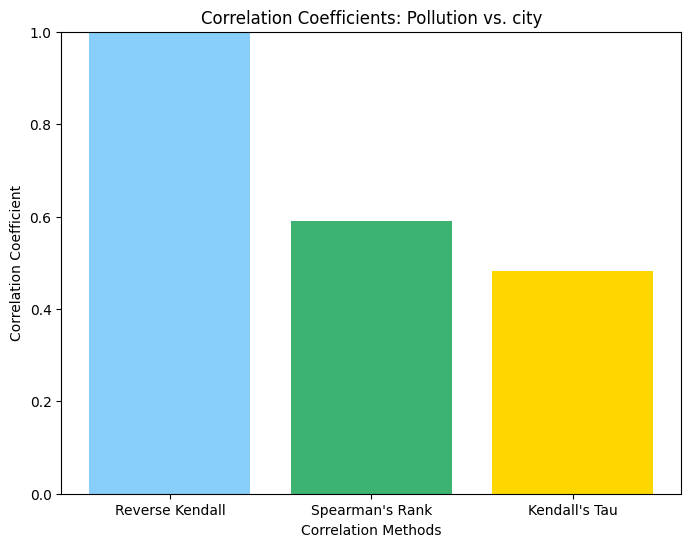

In [ ]:
#Correlation Coefficients between Pollution and city variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_city, city_corr, correlation_results['city'][3]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. city')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()